## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:


df = pd.read_csv(r'C:\Users\k_mah\Documents\miniproject4-master\data\data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [6]:
df.shape

(614, 13)

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [8]:
#1 credit_history
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

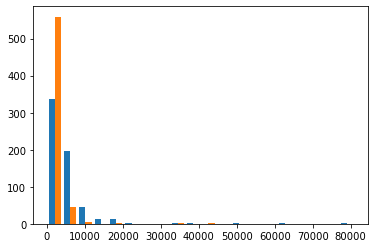

In [23]:
#2 incomes
plt.hist(x=df[['ApplicantIncome', 'CoapplicantIncome']], bins=20)
plt.show()

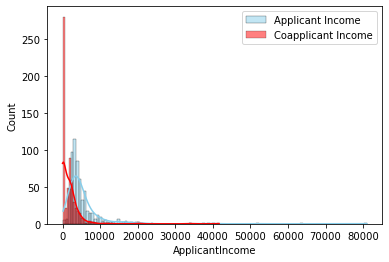

In [17]:
sns.histplot(data=df, x="ApplicantIncome", color="skyblue", label="Applicant Income", kde=True)
sns.histplot(data=df, x="CoapplicantIncome", color="red", label="Coapplicant Income", kde=True)

plt.legend() 
plt.show()

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
cat_col = df[['Dependents','Gender', 'Married', 'Education', 'Self_Employed', 
              'Credit_History', 'Property_Area', 'Loan_Status']]

for col in cat_col:
    print(col)
    print(cat_col[col].value_counts())

Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

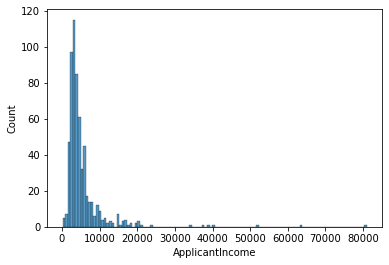

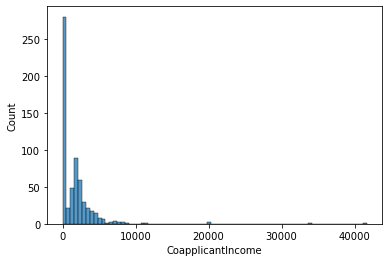

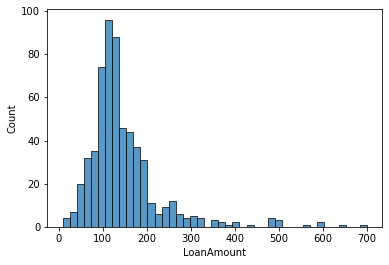

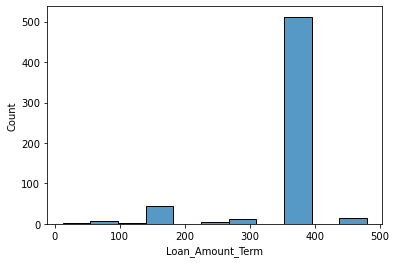

In [24]:
num_col = df[['ApplicantIncome', 'CoapplicantIncome', 
              'LoanAmount', 'Loan_Amount_Term']]

for col in num_col:
    plt.figure()
    sns.histplot(data = num_col, x = num_col[col])

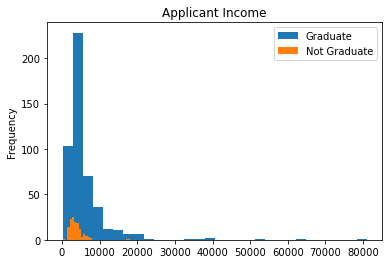

In [25]:
x1 = df.loc[df['Education'] == 'Graduate', 'ApplicantIncome']
x2 = df.loc[df['Education'] == 'Not Graduate', 'ApplicantIncome']

plt.hist(x=x1, bins=30, label='Graduate')
plt.hist(x=x2, bins=30, label='Not Graduate')
plt.title('Applicant Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
x1 = df.loc[df['Education'] == 'Graduate', 'ApplicantIncome']
x2 = df.loc[df['Education'] == 'Not Graduate', 'ApplicantIncome']

plt.hist(x=x1, bins=30, label='Graduate')
plt.hist(x=x2, bins=30, label='Not Graduate')
plt.title('Applicant Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

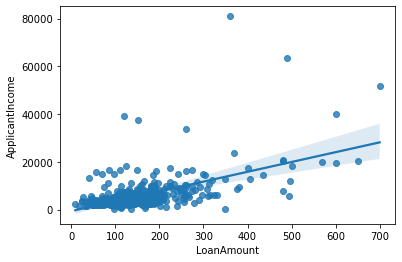

In [21]:
sns.regplot(x="LoanAmount", y="ApplicantIncome", data=df)
#looks like there might be a correlation here - with income and loan amounts

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



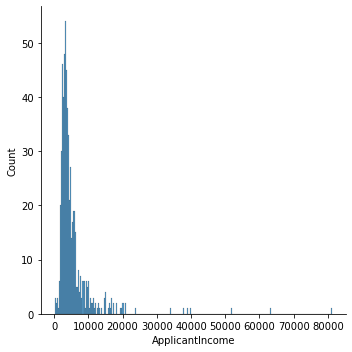

In [8]:
sns.displot(df, x="ApplicantIncome", binwidth=300)


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='ApplicantIncome'>

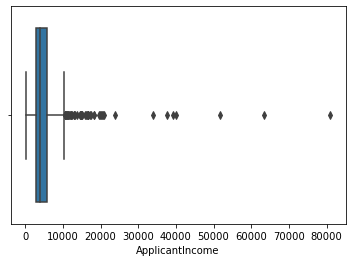

In [12]:
sns.boxplot(x=df["ApplicantIncome"])

Look at the distribution of income segregated  by `Education`

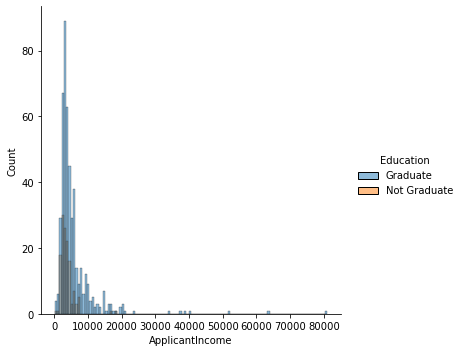

In [11]:
sns.displot(df, x="ApplicantIncome", hue="Education")

Look at the histogram and boxplot of LoanAmount

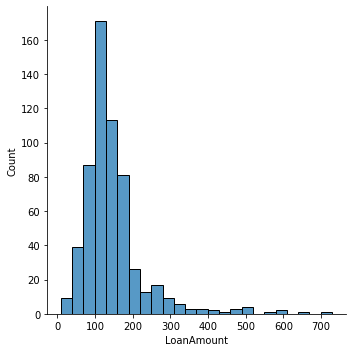

In [14]:
sns.displot(df, x="LoanAmount", binwidth=30)

<AxesSubplot:xlabel='LoanAmount'>

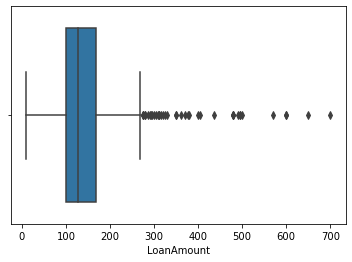

In [13]:

sns.boxplot(x=df["LoanAmount"])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [15]:
table = pd.pivot_table(df, values=['ApplicantIncome', 'LoanAmount'], index=['Property_Area', 'Education'],
                    aggfunc={'ApplicantIncome': [np.mean, np.median, min, max],
                             'LoanAmount': [np.mean, np.median, min, max]})

In [16]:
table

ApplicantIncome                             \
                                       max         mean  median   min   
Property_Area Education                                                 
Rural         Graduate               81000  6162.687023  4191.0   150   
              Not Graduate            7667  3893.104167  3599.5  1820   
Semiurban     Graduate               39999  5699.994652  4124.0  1500   
              Not Graduate           17263  3634.739130  3253.0   210   
Urban         Graduate               63337  5792.327160  3750.0   416   
              Not Graduate           18165  3802.225000  3046.5  1442   

                           LoanAmount                           
                                  max        mean median   min  
Property_Area Education                                         
Rural         Graduate          570.0  163.023622  141.0  40.0  
              Not Graduate      218.0  122.543478  120.0  48.0  
Semiurban     Graduate          600.0  152.587912  131.0  25.0  
              Not Graduate      279.0  117.478261  110.5  25.0  
Urban         Graduate          700.0  148.480769  120.0   9.0  
              Not Graduate      186.0  114.200000  120.0  35.0

In [ ]:
# Looks like the mean income is higher for graduates than it is for non-graduates in all levels of urbanization, and it looks like the people with higher incomes 
# (and education) are getting higher loans. In the case of loan amounts, the minimums are not looking very different, but the maximums and averages are very different
# so maybe this indicates a difference in the ability to borrow high ammounts